In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def intToHex(i,len):
    if(i>2**(len*32)):
        print("NUMBER TOO BIG")
        return ""
    return format(i,"#0%dx"%(2+len*8))

def intToHexStrings(i,len):
    num = intToHex(i,len)
    retArr = []
    num = num[2:]
    for i in arange(len):
        #print(num[0+i*8:8+i*8])
        #print(str(num[0+i*8:8+i*8]))
        retArr.append("0x"+str(num[0+i*8:8+i*8]))
        print(retArr[i])
    return retArr
def makeHeaderFiles(arr,name,bits,append = True):
    fH = 0
    fC = 0
    if(append):
        fH = open("inputs%d.h"%bits,"a")
        fC = open("inputs%d.c"%bits,"a")
    else:
        fH = open("inputs%d.h"%bits,"w+")
        fC = open("inputs%d.c"%bits,"w+")
    fC.write("#include \"inputs%d.h\"\n"%bits)
    fH.write("extern unsigned int %s[%d];\n"%(name,size(arr)))
    fC.write("extern unsigned int %s[%d] = {"%(name,size(arr)))
    for i in arange(size(arr)):
        if(i!=0):
            fC.write(",")
        fC.write("%s"%arr[i])
    fC.write("};\n")

    
def CAemodM(A,e,M):
    return (A**e)%M


def makeConsts(K,n,L,bits):
    #n is the length of an array
    kstring = "#define K %d;\n"%K
    nstring = "#define N %d;\n"%(K//2)
    lstring = "#define L %d;\n"%L
    sizeString = "#define SIZE %d\n"%n
    Bmask = 1<<(K-1)
    Emask = 1<<(L-1)
    Bmasks = intToHexStrings(Bmask,n)
    Emasks = intToHexStrings(Emask,n)
    R2 = intToHexStrings(2**(K//2),n)
    
    fH = open("consts%d.h"%bits,"w+")
    fC = open("consts%d.c"%bits,"w+")
    fC.write("#include \"consts.h\"\n")
    
    
    fH.write("#ifndef CONSTS_H\n#define CONSTS_H\n")
    fH.write(sizeString)
    fH.write(kstring)
    fH.write(nstring)
    fH.write(lstring)
    
    
    
    fH.write("extern const unsigned int %s[%d];\n"%("bmask_extern",n))
    fC.write("const unsigned int %s[%d] = {"%("bmask_extern",n))
    #print(type(Bmask))
    for i in arange(n):
        if(i!=0):
            fC.write(",")
        fC.write("%s"%Bmasks[i])
    fC.write("};\n")
             
             
    fH.write("extern const unsigned int %s[%d];\n"%("emask_extern",n))
    fC.write("const unsigned int %s[%d] = {"%("emask_extern",n))
             
             
    for i in arange(n):
        if(i!=0):
            fC.write(",")
        fC.write("%s"%Emasks[i])
    fC.write("};\n")
    
             
    fH.write("extern const unsigned int %s[%d];\n"%("R2_extern",n))
    fC.write("const unsigned int %s[%d] = {"%("R2_extern",n))
             
             
    for i in arange(n):
        if(i!=0):
            fC.write(",")
        fC.write("%s"%R2[i])
    fC.write("};\n")
    
             
    fH.write("#endif")
    
    fC.close()
    fH.close()
    
primes = [[8,37],[16,7681],[32,2802319549],[64,2673226546743238987],[96,65277372688404172762993854013],[128,26784902520253269591603403956095746741]]
primes = reshape(array(primes),(size(primes)//2,2))
temp = reshape(primes[:,0],(size(primes[:,0]),1))
print(temp)
temp =(temp%32>0)+temp//32+1

print(primes)
print(temp)
#todo: do bits

[[8]
 [16]
 [32]
 [64]
 [96]
 [128]]
[[8 37]
 [16 7681]
 [32 2802319549]
 [64 2673226546743238987]
 [96 65277372688404172762993854013]
 [128 26784902520253269591603403956095746741]]
[[2]
 [2]
 [2]
 [3]
 [4]
 [5]]


In [4]:

for i in arange(size(temp))[:4]:
    break
    makeConsts(primes[i,0],temp[0],primes[i,0],primes[i,0])
    M = primes[i,1]
    A = long((long(M)-1)*random.random())
    E = long((long(M)-1)*random.random())
    
    print(A)
    print(E)
    print(M)
    X[i,0] = primes[i,0]
    X[i,1] = primes[i,1]
    X[i,2] = A
    X[i,3] = E
    X[i,4] = M
    
'''    
Mstr = intToHexStrings(M,2)
Estr = intToHexStrings(E,2)
Astr = intToHexStrings(A,2)
Cstr = intToHexStrings(C,2)
makeHeaderFiles(Mstr,"M_arr",append = False)
makeHeaderFiles(Estr,"E_arr")
makeHeaderFiles(Cstr,"C_arr")
makeHeaderFiles(Astr,"A_arr")
'''


'    \nMstr = intToHexStrings(M,2)\nEstr = intToHexStrings(E,2)\nAstr = intToHexStrings(A,2)\nCstr = intToHexStrings(C,2)\nmakeHeaderFiles(Mstr,"M_arr",append = False)\nmakeHeaderFiles(Estr,"E_arr")\nmakeHeaderFiles(Cstr,"C_arr")\nmakeHeaderFiles(Astr,"A_arr")\n'

In [4]:
X = empty((4,7),dtype=object)
X[0,5] = 34
X[1,5] = 3532
X[2,5] = 2054440219
X[3,5] = long("135291984750101496")
X[:,0] = primes[:4,0]
X[:,1] = primes[:4,1]
X[0,2]=35
X[0,3]=8
X[0,4]=37
X[1,2]=1683
X[1,3]=502
X[1,4]=7681
X[2,2]=939736442
X[2,3]=13452636
X[2,4]=2802319549
X[3,2]=long("1762571356056571648")
X[3,3]=long("1032321769620534912")
X[3,4]=long("2673226546743238987")
X[:,6]= squeeze(temp[:4])
print(X)

[[8 37 35 8 37 34 2]
 [16 7681 1683 502 7681 3532 2]
 [32 2802319549 939736442 13452636 2802319549 2054440219 2]
 [64 2673226546743238987 1762571356056571648 1032321769620534912
  2673226546743238987 135291984750101496 3]]


In [5]:
for i in arange(4):
    makeConsts(X[i,0],X[i,6],X[i,0],X[i,0])
    makeHeaderFiles(intToHexStrings(X[i,4],X[i,6]),"M_arr",X[i,0],append = False)
    makeHeaderFiles(intToHexStrings(X[i,3],X[i,6]),"E_arr",X[i,0])
    makeHeaderFiles(intToHexStrings(X[i,5],X[i,6]),"C_arr",X[i,0])
    makeHeaderFiles(intToHexStrings(X[i,2],X[i,6]),"A_arr",X[i,0])
    

0x00000000
0x00000080
0x00000000
0x00000080
0x00000000
0x00000010
0x00000000
0x00000025
0x00000000
0x00000008
0x00000000
0x00000022
0x00000000
0x00000023
0x00000000
0x00008000
0x00000000
0x00008000
0x00000000
0x00000100
0x00000000
0x00001e01
0x00000000
0x000001f6
0x00000000
0x00000dcc
0x00000000
0x00000693
0x00000000
0x80000000
0x00000000
0x80000000
0x00000000
0x00010000
0x00000000
0xa70800bd
0x00000000
0x00cd455c
0x00000000
0x7a74451b
0x00000000
0x38033d7a
0x00000000
0x80000000
0x00000000
0x00000000
0x80000000
0x00000000
0x00000000
0x00000001
0x00000000
0x00000000
0x25193561
0x82c6614b
0x00000000
0x0e538b2e
0x14227680
0x00000000
0x01e0a757
0xe3fcc3f8
0x00000000
0x1875e94f
0x5107cf00


In [44]:
makeConsts(16,3,16)

0x00000000
0x00000000
0x00008000
0x00000000
0x00000000
0x00008000
0x00000000
0x00000000
0x00000100


## $C = A^e mod(M)$
### M = odd prime number greater than A or e
### A = Anything your heart desires
### e = anything your heart desires

In [28]:
#intToHexStrings(0x123456781234567812345678,3)
#makeHeaderFiles(intToHexStrings(0x123456781234567812345678,3),"test",append = False)

In [29]:
M = "16,473,402,326,825,167,309"
M = M.replace(",","")
print(M)

16473402326825167309


In [30]:
A = long((long(M)-1)*random.random())
E = long((long(M)-1)*random.random())
print(A)

9812707524584114176


In [31]:
E = long((long(M)-1)*random.random())
print(E)
M = long(M)
print(E<M)
C = long("10855436929707441813")

6373617756507233280
True


In [32]:
Mstr = intToHexStrings(M,2)
Estr = intToHexStrings(E,2)
Astr = intToHexStrings(A,2)
Cstr = intToHexStrings(C,2)
makeHeaderFiles(Mstr,"M_arr",append = False)
makeHeaderFiles(Estr,"E_arr")
makeHeaderFiles(Cstr,"C_arr")
makeHeaderFiles(Astr,"A_arr")

0xe49d4822
0xec81e9cd
0x5873a394
0xa6bc5c00
0x882dbd80
0xefa38800
0x96a6425f
0x7cde7e95


In [33]:
%qtconsole

In [34]:
M = "14,767"
M = M.replace(",","")
print(M)


14767


In [35]:
A = long((long(M)-1)*random.random())
print(A)

6213


In [36]:
E = long((long(M)-1)*random.random())
print(E)
M = long(M)
print(E<M)
C = CAemodM(A,E,M)

537
True


In [45]:
Mstr = intToHexStrings(M,3)
Estr = intToHexStrings(E,3)
Astr = intToHexStrings(A,3)
Cstr = intToHexStrings(C,3)
makeHeaderFiles(Mstr,"M_arr",append = False)
makeHeaderFiles(Estr,"E_arr")
makeHeaderFiles(Cstr,"C_arr")
makeHeaderFiles(Astr,"A_arr")

0x00000000
0x00000000
0x000039af
0x00000000
0x00000000
0x00000219
0x00000000
0x00000000
0x00001845
0x00000000
0x00000000
0x00000029


In [38]:
print(A)
print(E)
print(M)
print(C)

6213
537
14767
41


In [39]:
hex(855)
print(bin(24))
print(bin(48))

0b11000
0b110000


#### 2**8

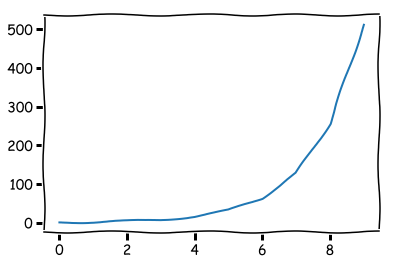

In [85]:
xkcd()
plot(arange(10),2**arange(10))